In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [4]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)


df = df.reset_index(drop=True)

In [5]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified | A simple story with an unfor...      5  2023-07-21   
1  ✅ Trip Verified |  Flight was delayed due to t...      1  2023-07-21   
2  Not Verified |  Fast and friendly check in (to...      4  2023-07-20   
3  ✅ Trip Verified |  I don't understand why Brit...      8  2023-07-20   
4  Not Verified |  I'm sure that BA have graduall...      2  2023-07-20   

          country  verified                                             corpus  
0         Germany      True  simple story unfortunate outcome really could ...  
1  United Kingdom      True  flight delayed due inbound flight arriving lat...  
2  United Kingdom     False  verified fast friendly check total contrast ga...  
3  United Kingdom      True  understand british airway classified star airl...  
4  United Kingdom     False  verified sure ba gradually made economy experi...

What is the average overall rating given for British Airways?

In [6]:
df.stars.mean()

4.732321786430003

What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

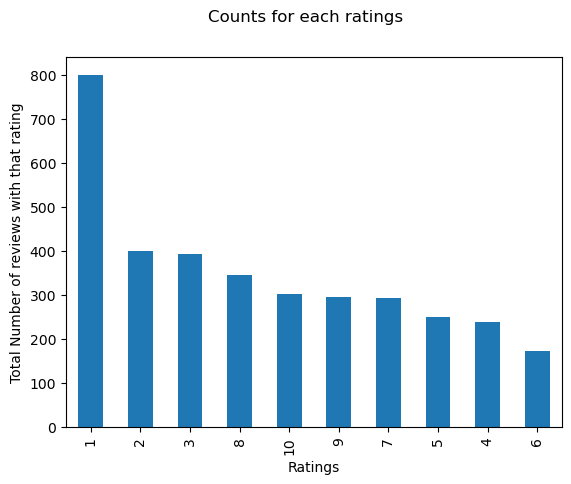

In [7]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [8]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [9]:
df_ratings = df_ratings.reset_index()

In [10]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [11]:
df_ratings

Stars  total_counts  pct_values
0      1           800       22.90
1      2           401       11.48
2      3           392       11.22
3      8           346        9.91
4     10           302        8.65
5      9           296        8.47
6      7           293        8.39
7      5           251        7.19
8      4           239        6.84
9      6           173        4.95

Text(0.5, 1.0, 'Counts for each ratings')

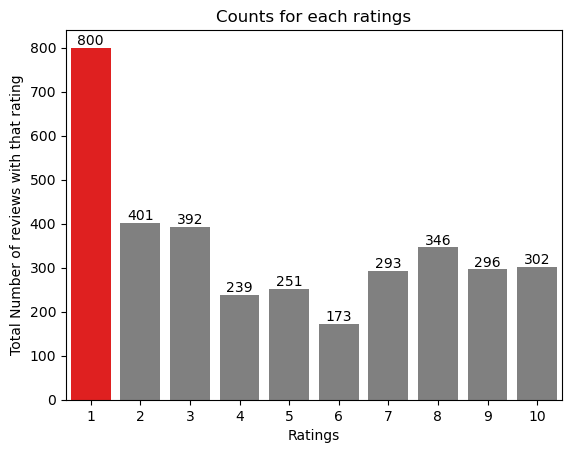

In [12]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [13]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


Which country most review comes from?

In [14]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()


In [15]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

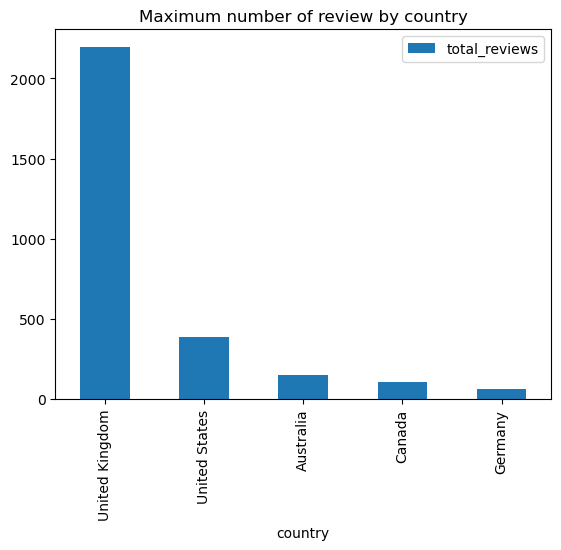

In [16]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

Which country provided on average highest ratings?

In [17]:
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()


In [18]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

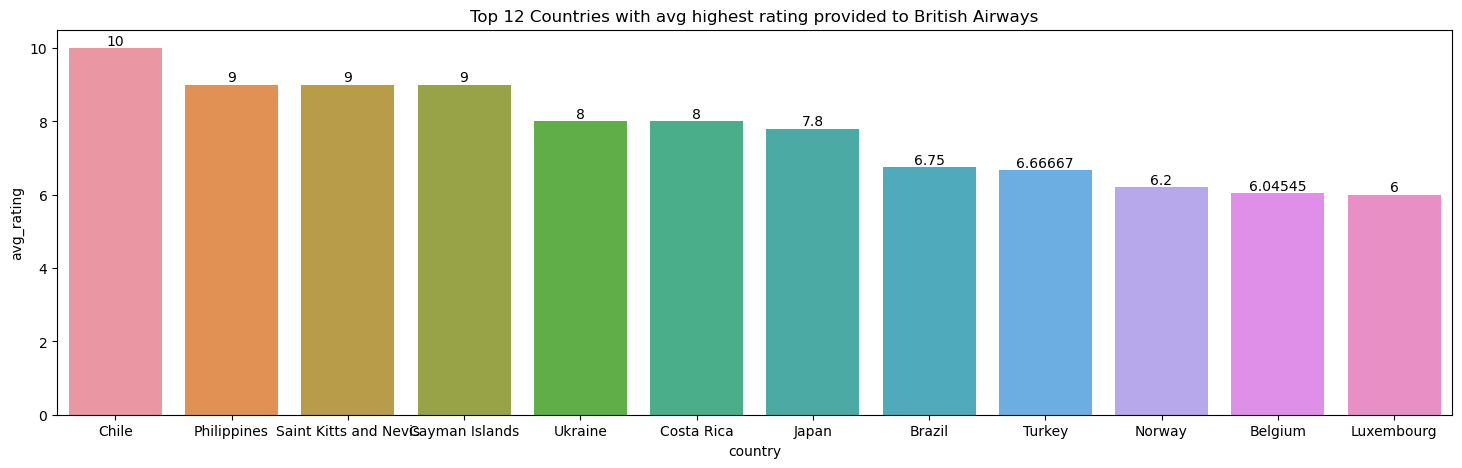

In [19]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

Time Series Analysis

In [20]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

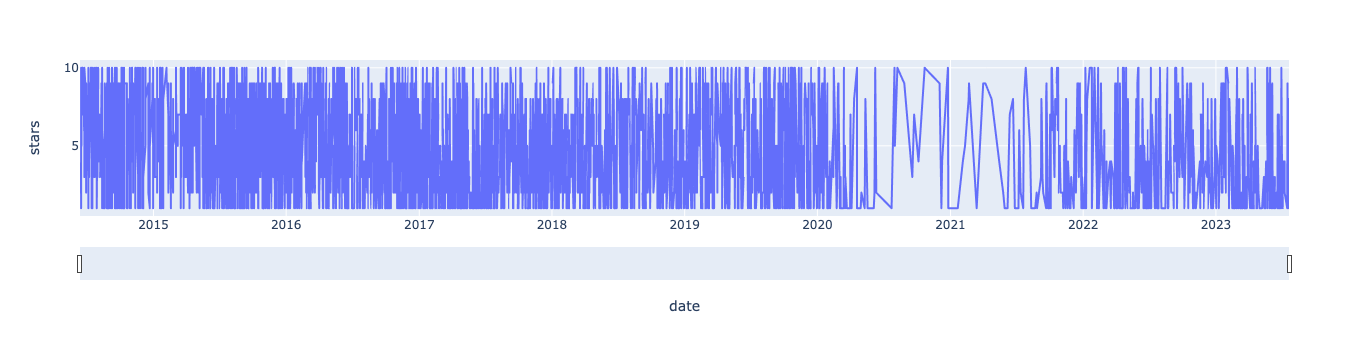

In [21]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

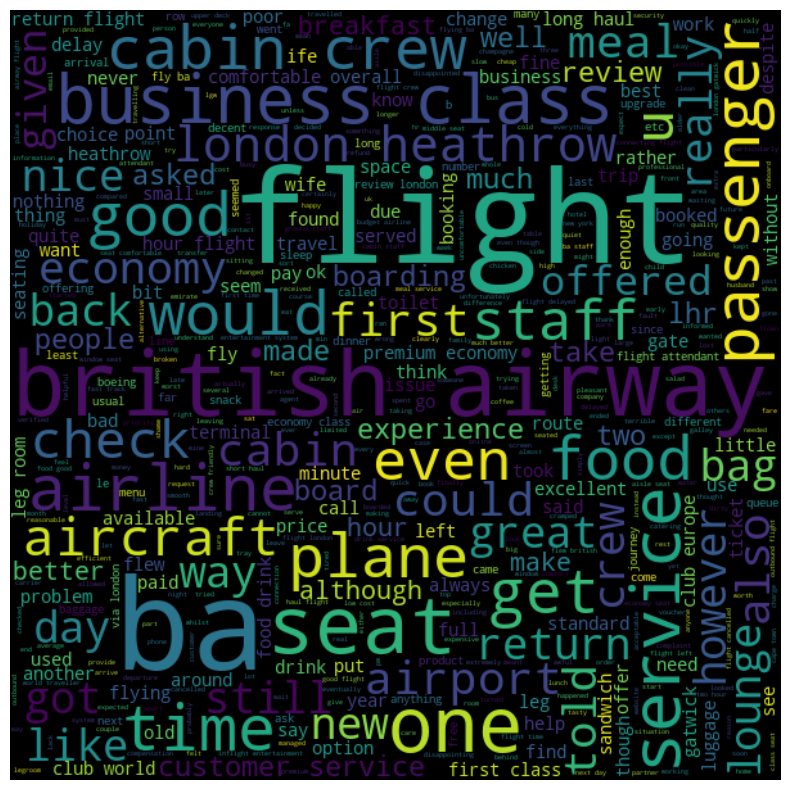

In [22]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conclusive value hence we can include them in stopwords list.

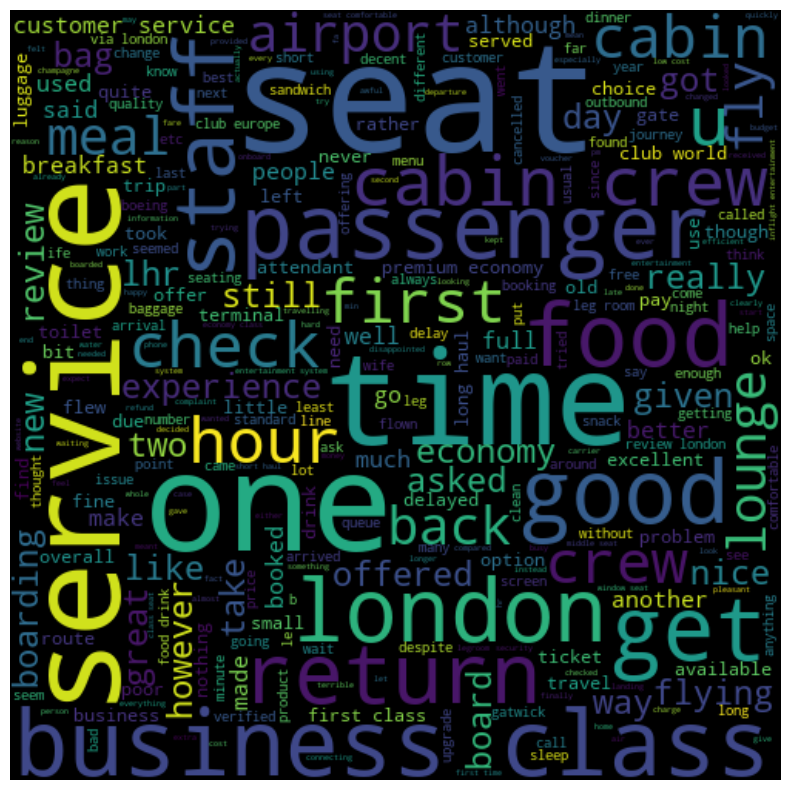

In [23]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Frequency

In [24]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

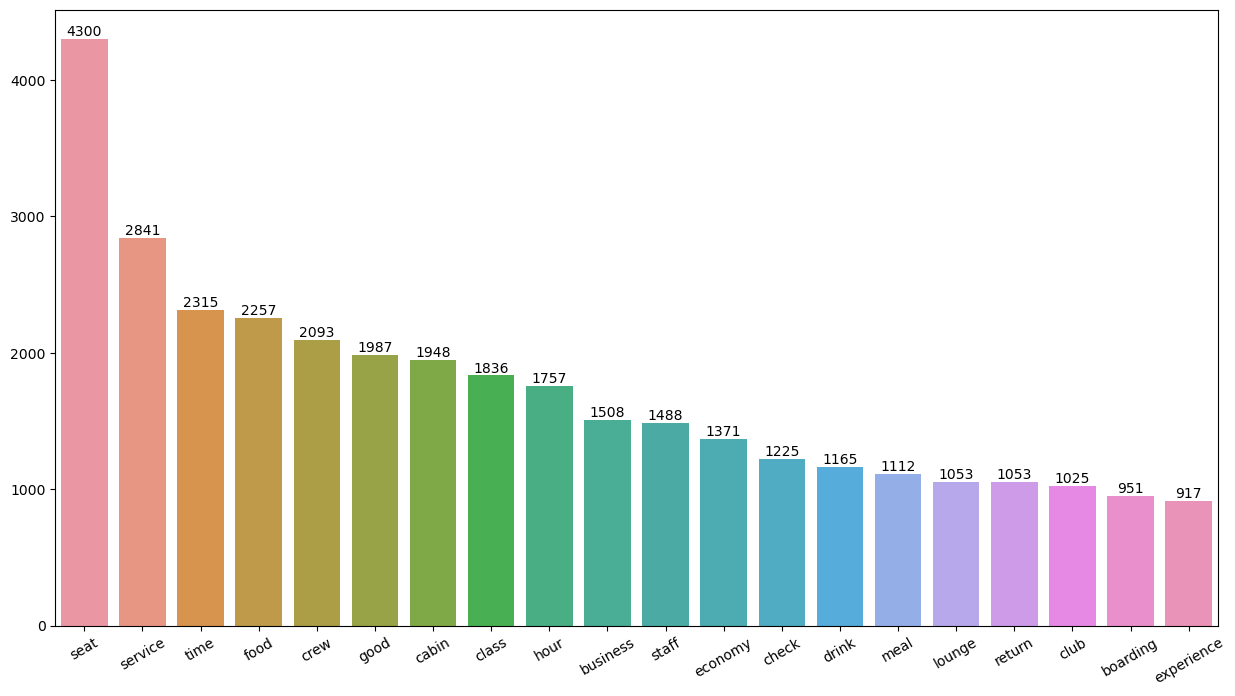

In [25]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "time" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

Word Frequency with N-gram

<Axes: >

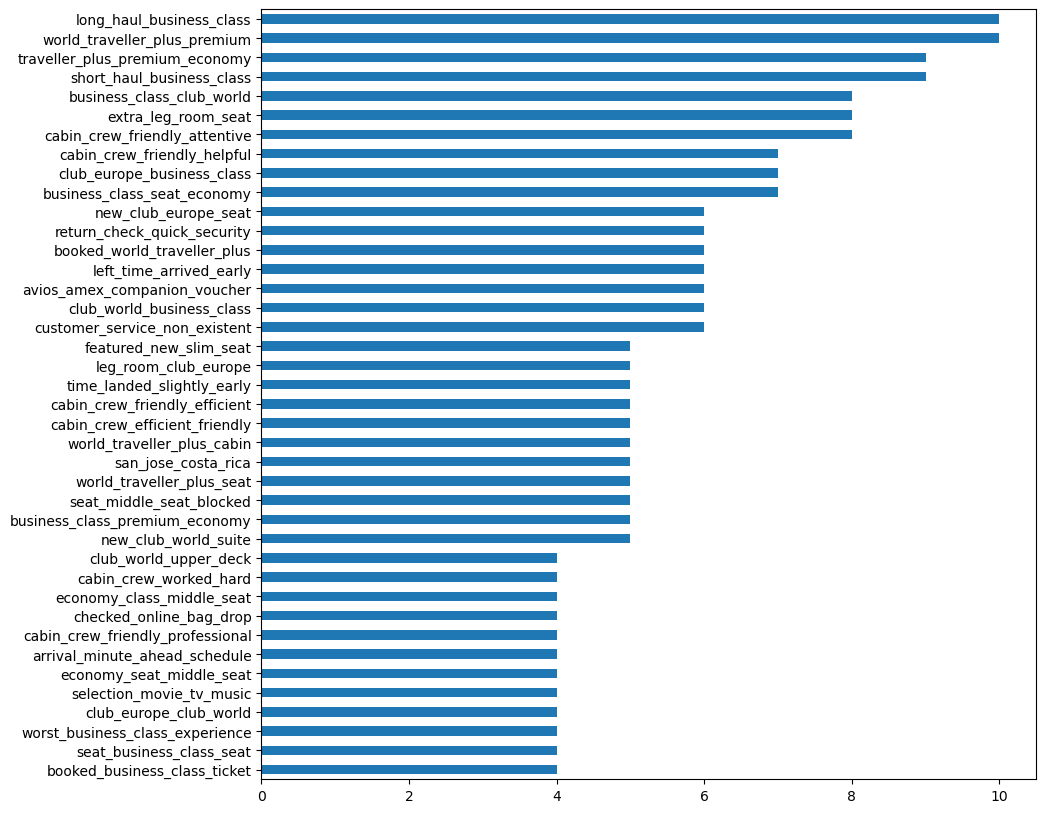

In [26]:
# Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    # Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [27]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

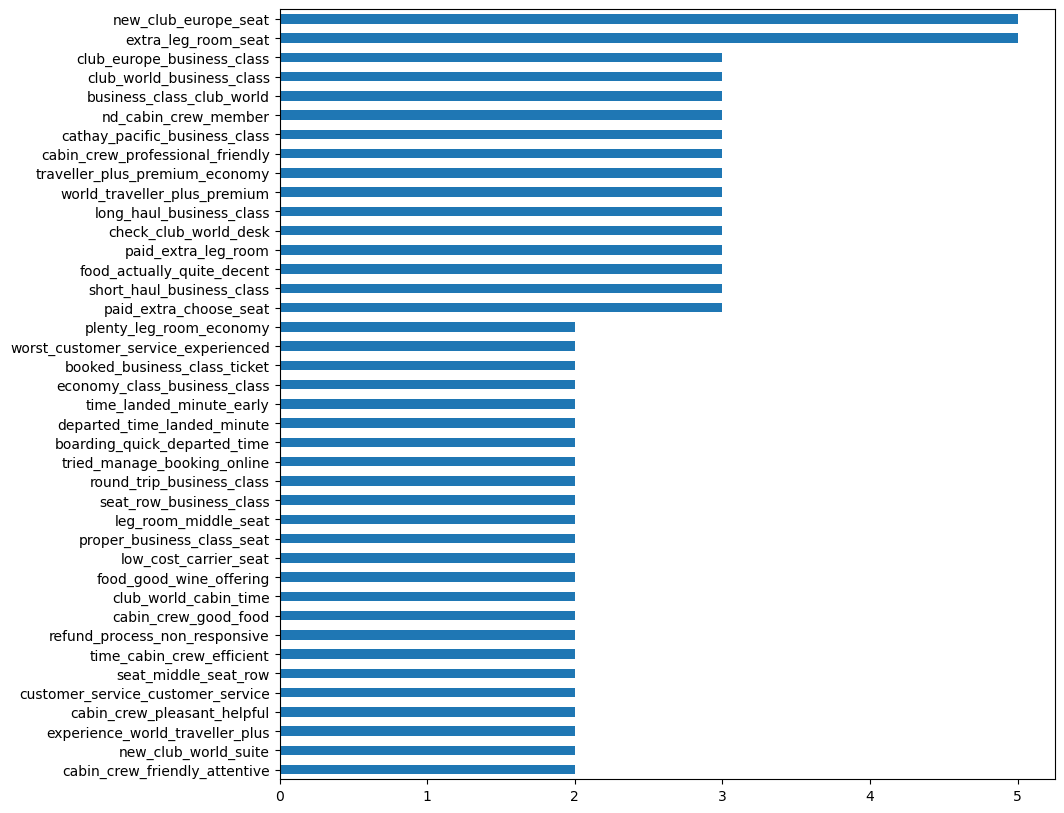

In [28]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

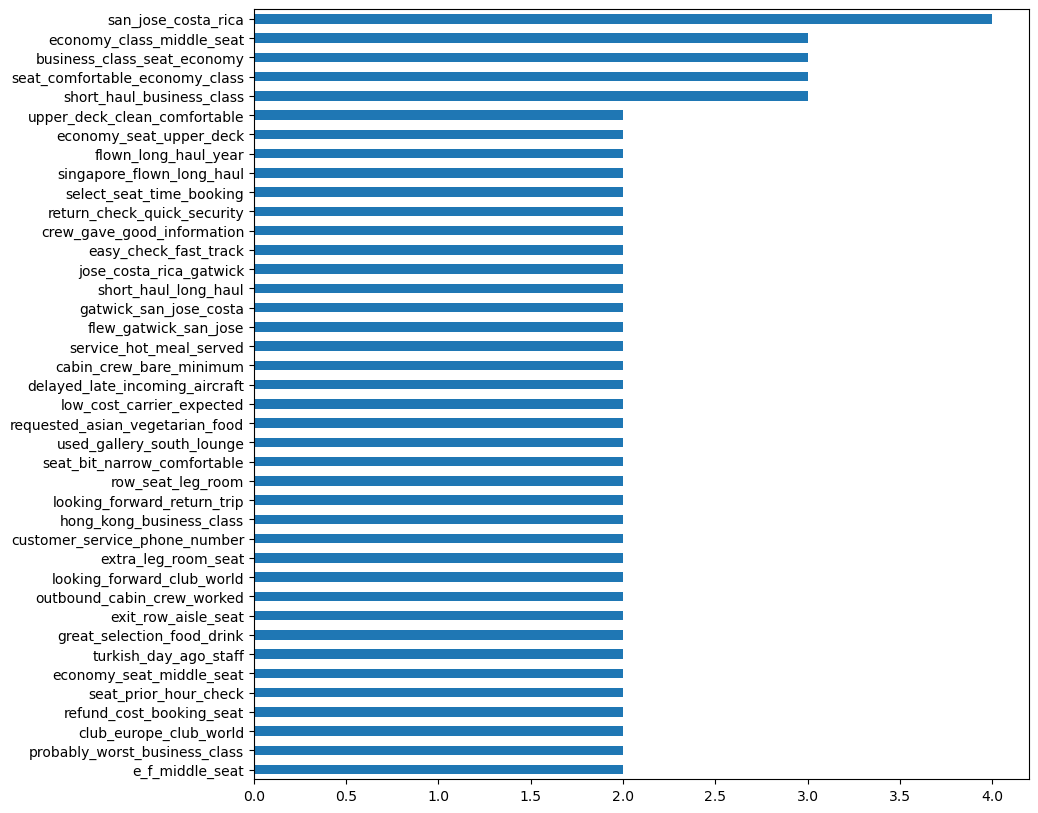

In [29]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

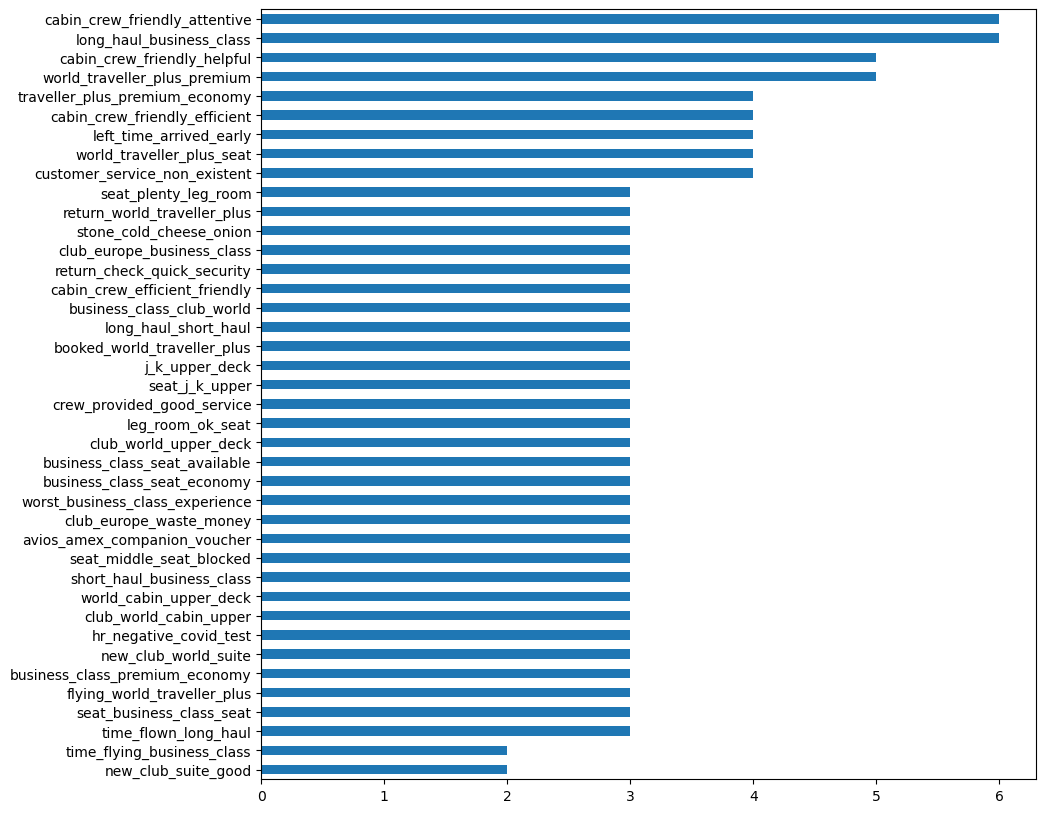

In [30]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

 Textblob library to define if the text is negative or positive and to what extent

In [31]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [32]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [33]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2358 number of reviews between -0.2 and 0.2 polarity score
1371 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2358 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

Another method of labelling the reveiws as positives or negatives is by using VADER algorihtm by nltk library.



In [34]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()


In [35]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [36]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight          1473.0          crew           189.3        flight   
1            ba           871.5        flight           174.1          call   
2          hour           678.4     passenger           173.2           bag   
3          told           520.1         cabin           170.6         cabin   
4      customer           455.7          meal           166.8       service   
5        london           447.6          seat           153.6        london   
6           day           440.3           one           150.1           san   
7        airway           425.7       service           121.4          time   
8       british           422.7         staff           109.8         staff   
9           get           405.1         class           101.4           get   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0            82.7            ba           346.4          seat          2545.0   
1            40.3          meal           308.3        flight          1503.8   
2            38.6          food           301.4            ba          1384.1   
3            38.6        flight           255.4         class          1341.1   
4            37.1       economy           225.9          food          1113.5   
5            36.6          seat           221.0          good          1078.8   
6            35.0       service           199.1      business          1074.9   
7            31.1         drink           192.0         cabin           898.0   
8            31.0           one           188.9       service           850.3   
9            30.3         class           163.7          crew           814.9   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight          1587.4        flight           697.7        flight   
1          time           762.9            ba           689.4            ba   
2          good           710.2          seat           532.2          seat   
3          crew           662.2       service           425.1        airway   
4      boarding           549.6       airline           316.2       british   
5         check           525.8          hour           295.7       airline   
6       service           502.2       british           291.9        london   
7            ba           492.7        airway           285.8       service   
8        lounge           489.4          food           258.3          time   
9         drink           436.0         would           233.7      heathrow   

  Topic 7 weights  
0          1667.7  
1           814.0  
2           588.8  
3           581.9  
4           576.5  
5           570.1  
6           441.3  
7           313.0  
8           313.0  
9           277.7

Topic modeling with NMF

In [37]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.14543325, 0.01319363],
       [0.10207959, 0.0098085 ],
       [0.02512311, 0.05775664],
       ...,
       [0.02396108, 0.08624524],
       [0.09873527, 0.05660781],
       [0.05483025, 0.04701972]])

In [38]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [39]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [40]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            36.6          seat            17.4
1            ba            12.5            ba             9.2
2          hour             8.1         class             7.4
3          time             7.0          food             6.0
4        london             6.4      business             5.8
5       service             6.1       service             5.7
6        airway             5.9         cabin             5.6
7       british             5.8          good             5.2
8         would             5.3          crew             5.2
9       airline             4.6       economy             4.7